<a href="https://colab.research.google.com/github/Marcos5252/AtividadeAnaliseDeDados/blob/main/Atividade_Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS

import pandas as pd #Pandas serve para trabalhar com tabelas de dados (DataFrames)
import numpy as np #Numpy serve para calculos numéricos e calculos com arrays.
import matplotlib.pyplot as plt #MatplotLib serve para criação de gráficos.
import seaborn as sns #Seaborn também serve para gráficos, mas de forma mais atrante que o MatplotLib

2- Carregamento dos Dados

In [4]:
import pandas as pd

#Importando o Dataframe para o Pandas e fazendo o display das primeiras 5 linhas.
file_path = 'ecommerce_sales.csv'
df_ecommerce = pd.read_csv(file_path)
display(df_ecommerce.head())

,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35


3-Visão Geral do Dataset

In [31]:
#Exibindo 10 linhas para um aprofundamento.

display(df_ecommerce.head(10))
#Verificando o tamanho de todo o dataframe

print(f"O DataFrame df_ecommerce possui {df_ecommerce.shape[0]} linhas e {df_ecommerce.shape[1]} colunas.")

,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35
5,SALE00680,3160.54,20923.0,5.12,3.08,15,479,143.89,750.0,9.83,Home,Medium,Medium,No,Credit Card,60.87,7442.12
6,SALE02187,5963.00,16427.0,5.22,3.09,15,310,182.32,326.0,7.36,Books,Medium,Low,Yes,Credit Card,79.12,8427.92
7,SALE00010,1176.17,17276.0,6.29,3.21,10,229,5.28,51.0,11.34,Sports,Medium,Low,Yes,Debit Card,65.37,7237.02
8,SALE01091,3464.77,19888.0,6.59,2.82,15,212,11.39,833.0,9.09,Home,High,Medium,No,Bank Transfer,73.41,7436.30
9,SALE01884,8317.39,14561.0,5.16,2.80,15,193,41.44,NaN,10.60,Fashion,High,Medium,No,Bank Transfer,68.31,7439.08


O DataFrame df_ecommerce possui 2510 linhas e 17 colunas.


4-Análise de Valores Faltantes

In [29]:
#Verificando quais são as informações mais frequentemente faltantes

missing_values = df_ecommerce.isnull().sum()
missing_percentage = (df_ecommerce.isnull().sum() / len(df_ecommerce)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Filtrar apenas colunas com valores faltantes e ordenar
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("\nResumo Detalhado de Valores Faltantes:")
display(missing_info)


Resumo Detalhado de Valores Faltantes:


,Missing Count,Missing Percentage
customer_reviews,247,9.840637
return_rate,226,9.003984
marketing_spend,197,7.848606
conversion_rate,194,7.729084
website_traffic,154,6.135458
avg_product_rating,139,5.537849


**5-Análise** da Variável Alvo (final_grade)

In [34]:
#Verficando a variável alvo, RESUMO DAS VENDAS

total_sales_sum = df_ecommerce['monthly_sales'].sum()
total_sales_count = df_ecommerce['monthly_sales'].count()

print(f"Valor total da soma das vendas mensais: R$ {total_sales_sum:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"Número total de vendas registradas: {total_sales_count}")

Valor total da soma das vendas mensais: R$ 19.379.125,50
Número total de vendas registradas: 2510


## 6- Análise Univariada - Variáveis Numéricas

Vamos explorar a distribuição e estatísticas descritivas de todas as variáveis numéricas (exceto a variável alvo `monthly_sales`), usando histogramas e box plots para identificar padrões e possíveis outliers.

Iniciando a análise univariada das variáveis numéricas (excluindo 'monthly_sales').


--- Análise para a coluna: marketing_spend ---
Estatísticas Descritivas:


,marketing_spend
count,2313.000000
mean,5502.807683
std,5969.862731
min,-631.010000
25%,3589.000000
50%,4969.550000
75%,6386.070000
max,79343.500000


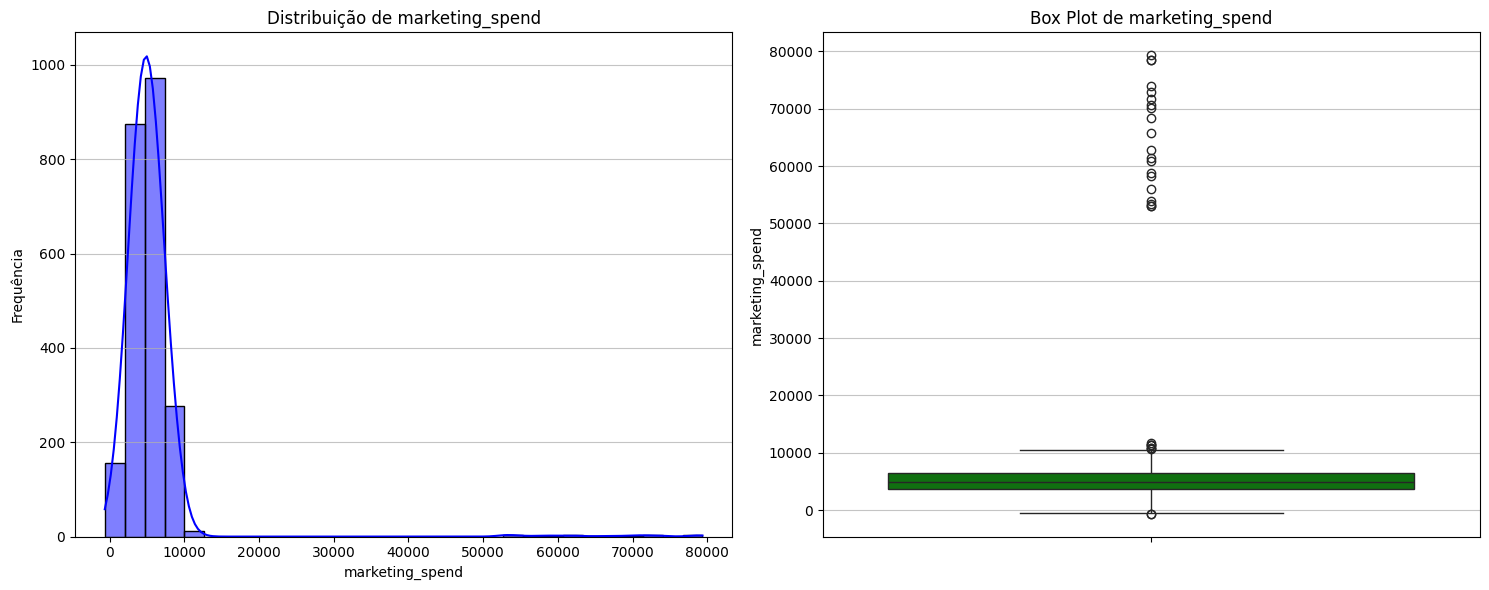

--------------------------------------------------

--- Análise para a coluna: website_traffic ---
Estatísticas Descritivas:


,website_traffic
count,2356.000000
mean,16004.242360
std,11857.502842
min,579.000000
25%,11716.750000
50%,15235.000000
75%,18689.750000
max,191152.000000


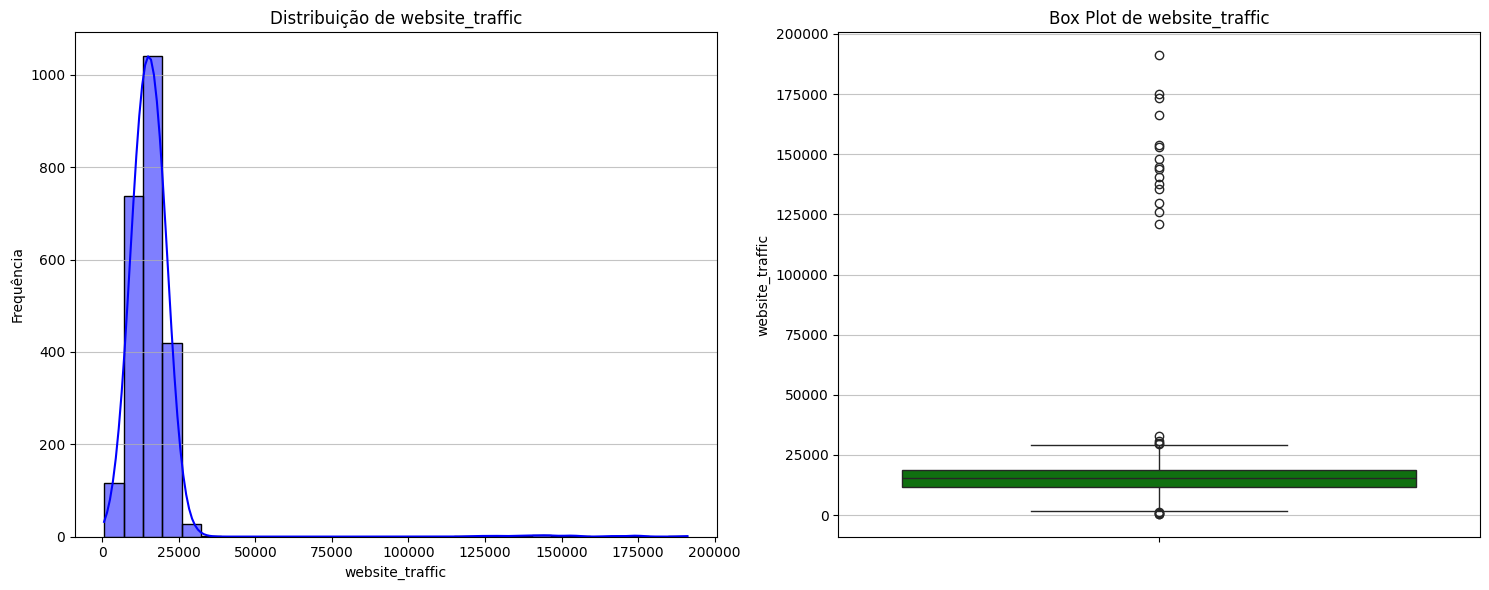

--------------------------------------------------

--- Análise para a coluna: conversion_rate ---
Estatísticas Descritivas:


,conversion_rate
count,2316.000000
mean,5.656852
std,1.674376
min,2.360000
25%,4.870000
50%,5.605000
75%,6.330000
max,29.280000


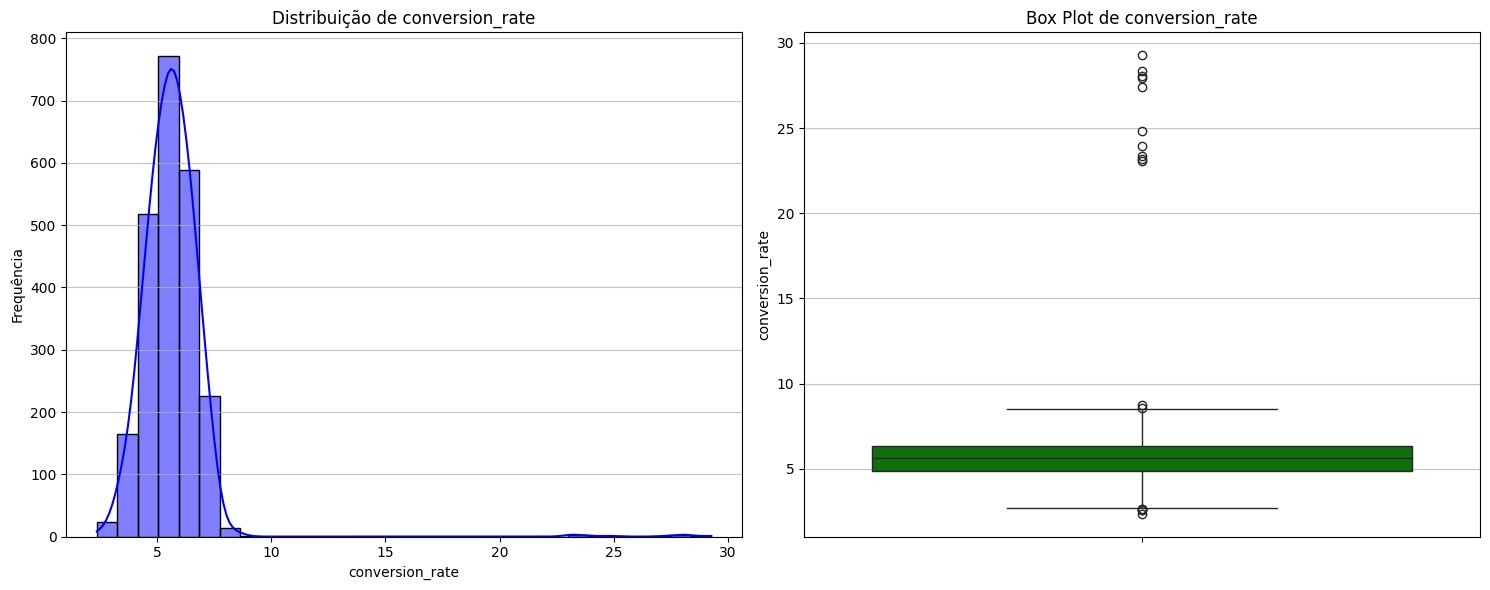

--------------------------------------------------

--- Análise para a coluna: avg_product_rating ---
Estatísticas Descritivas:


,avg_product_rating
count,2371.000000
mean,2.963598
std,0.519186
min,1.270000
25%,2.630000
50%,2.970000
75%,3.310000
max,6.500000


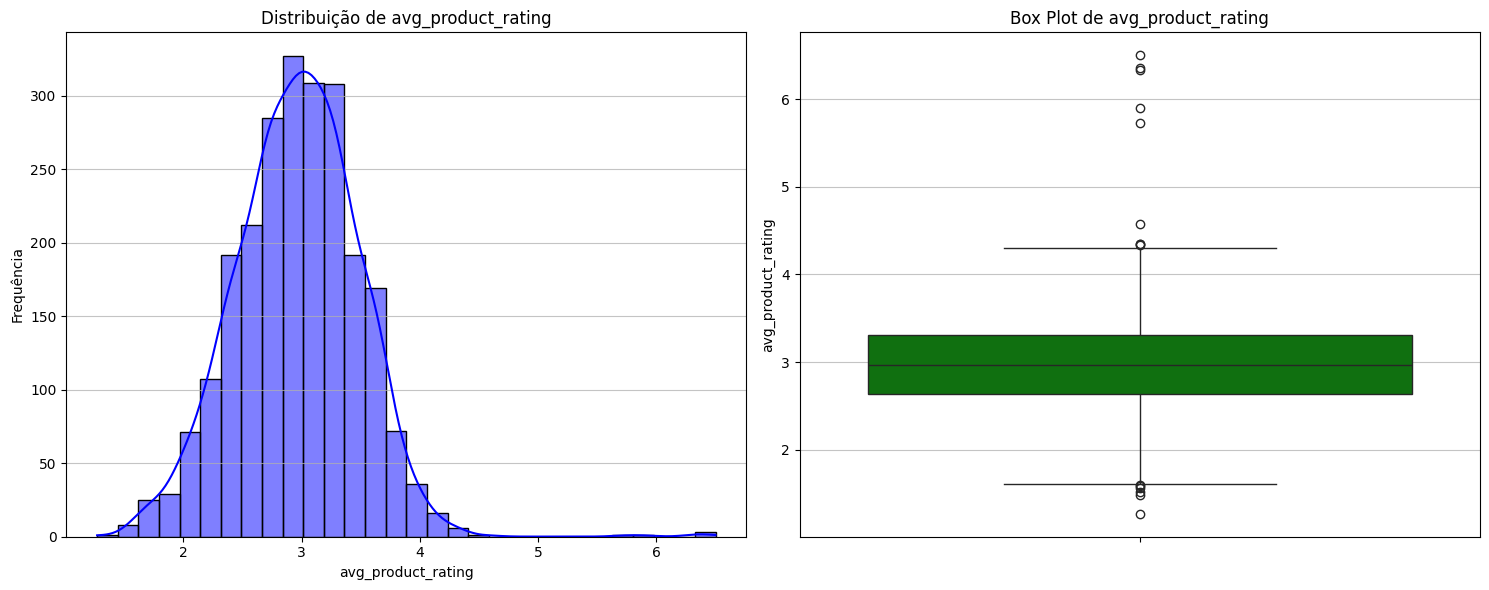

--------------------------------------------------

--- Análise para a coluna: discount_percentage ---
Estatísticas Descritivas:


,discount_percentage
count,2510.000000
mean,13.570916
std,7.419097
min,0.000000
25%,10.000000
50%,10.000000
75%,15.000000
max,70.000000


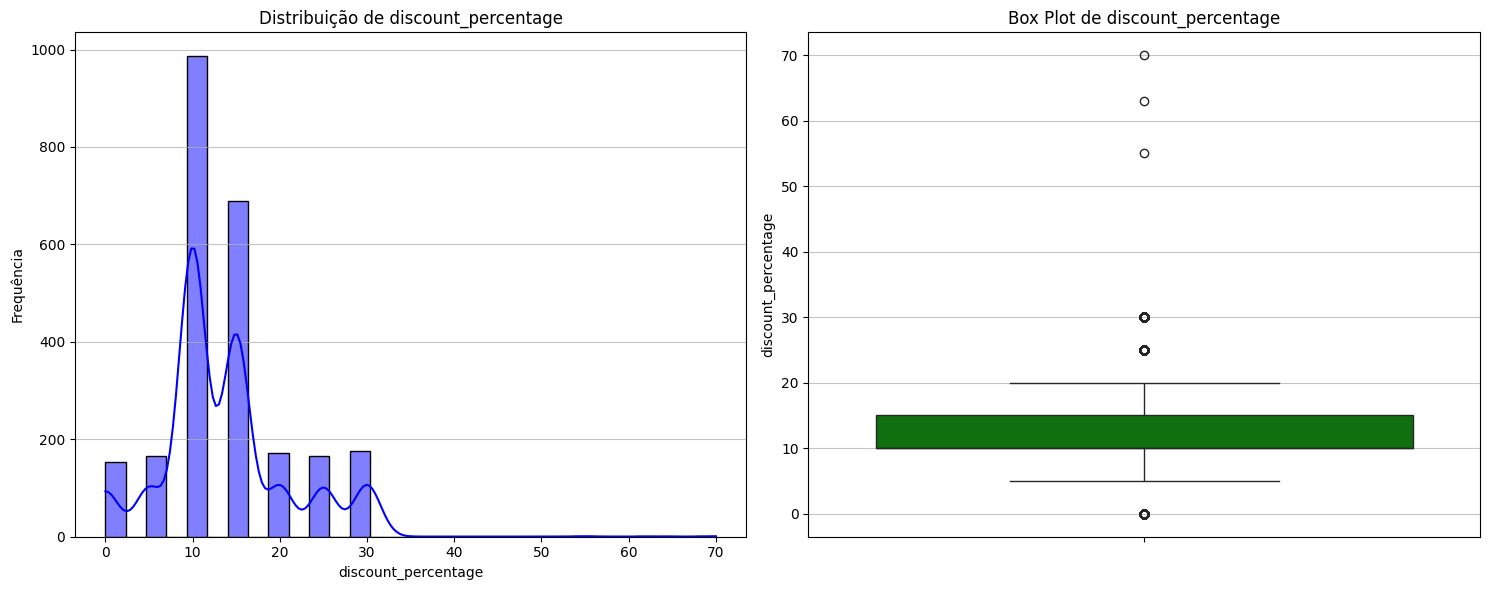

--------------------------------------------------

--- Análise para a coluna: num_products ---
Estatísticas Descritivas:


,num_products
count,2510.000000
mean,256.639044
std,142.989486
min,10.000000
25%,135.000000
50%,256.000000
75%,381.000000
max,500.000000


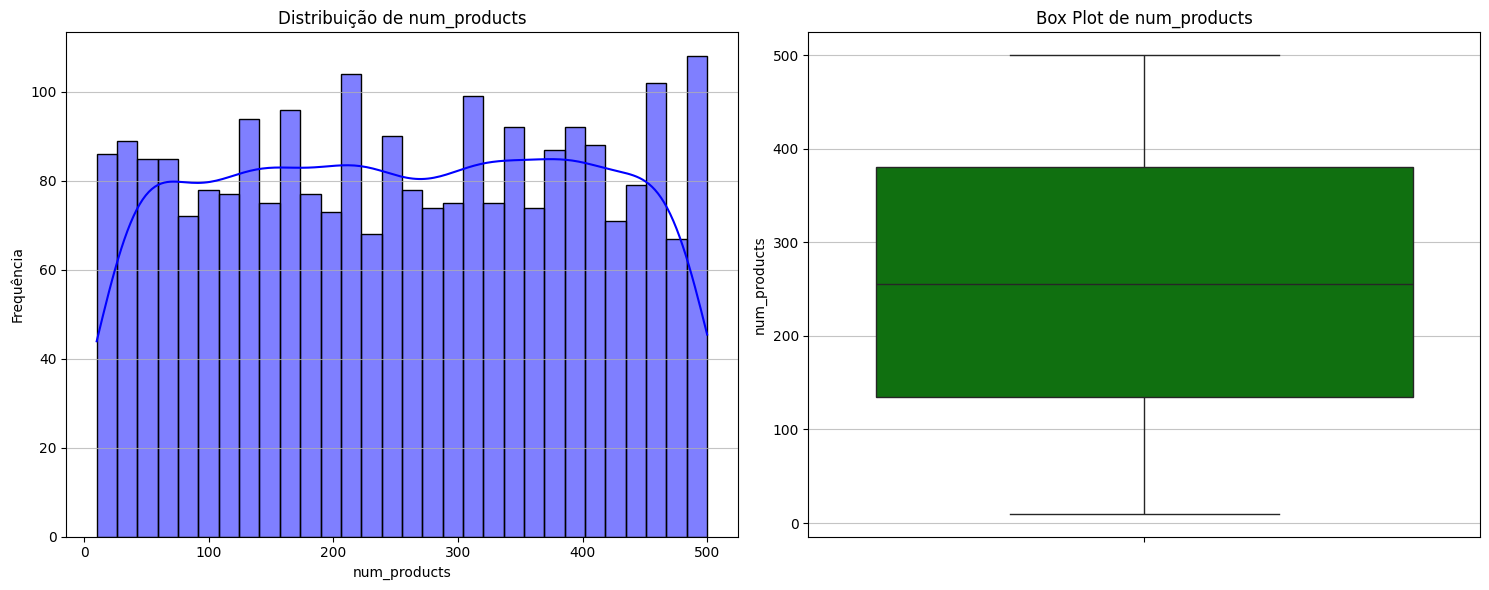

--------------------------------------------------

--- Análise para a coluna: avg_price ---
Estatísticas Descritivas:


,avg_price
count,2510.000000
mean,147.908295
std,75.601964
min,0.020000
25%,90.100000
50%,146.450000
75%,197.962500
max,472.800000


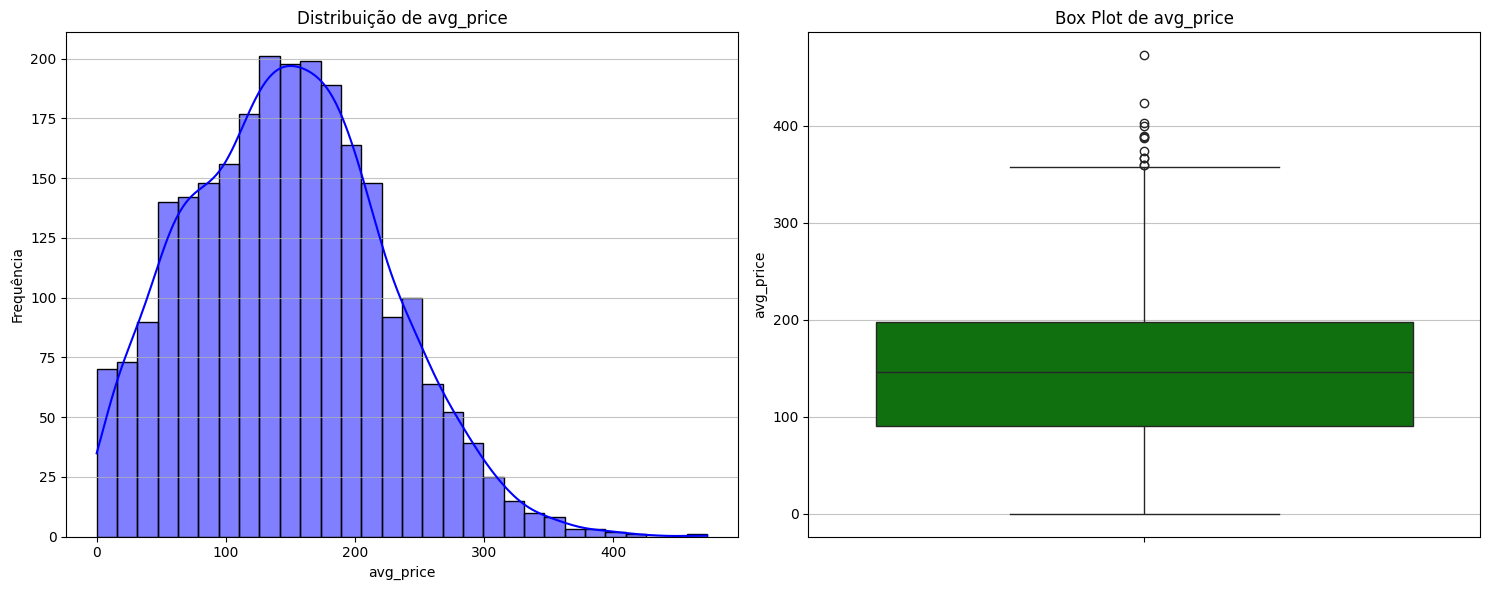

--------------------------------------------------

--- Análise para a coluna: customer_reviews ---
Estatísticas Descritivas:


,customer_reviews
count,2263.000000
mean,503.790985
std,286.175109
min,1.000000
25%,263.500000
50%,505.000000
75%,744.500000
max,999.000000


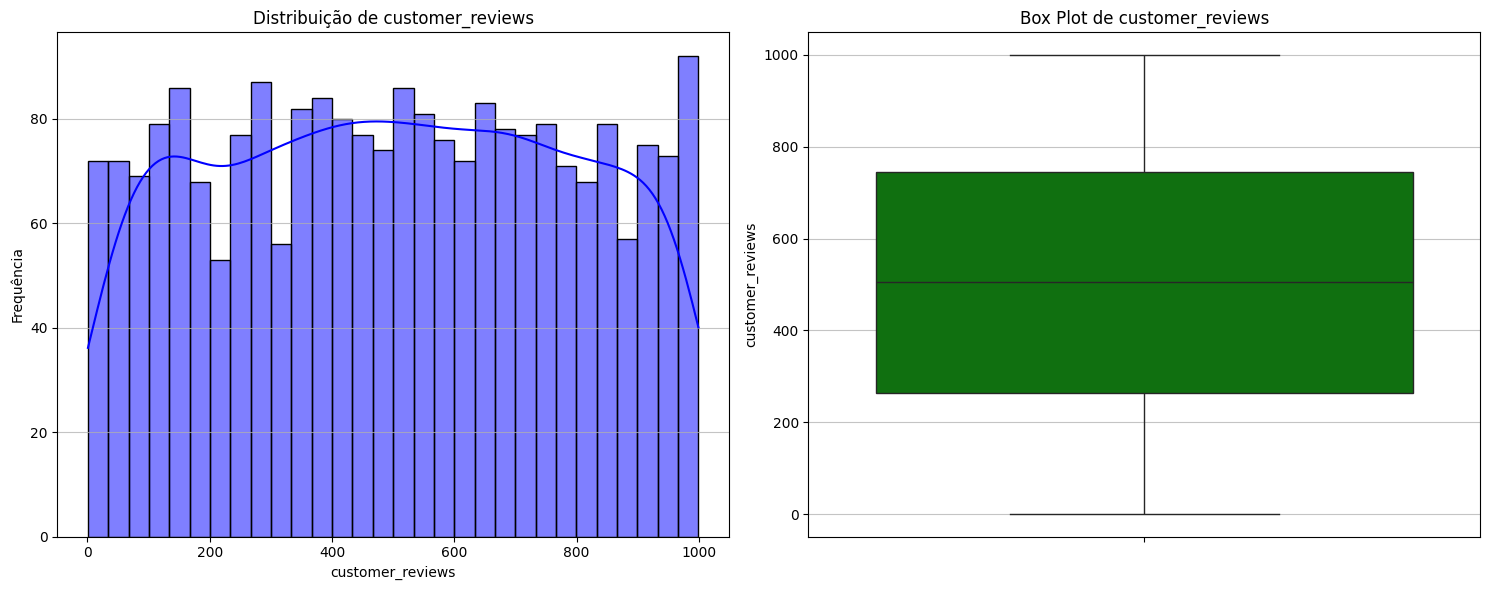

--------------------------------------------------

--- Análise para a coluna: return_rate ---
Estatísticas Descritivas:


,return_rate
count,2284.000000
mean,9.104133
std,3.489621
min,3.990000
25%,7.907500
50%,8.945000
75%,9.902500
max,59.890000


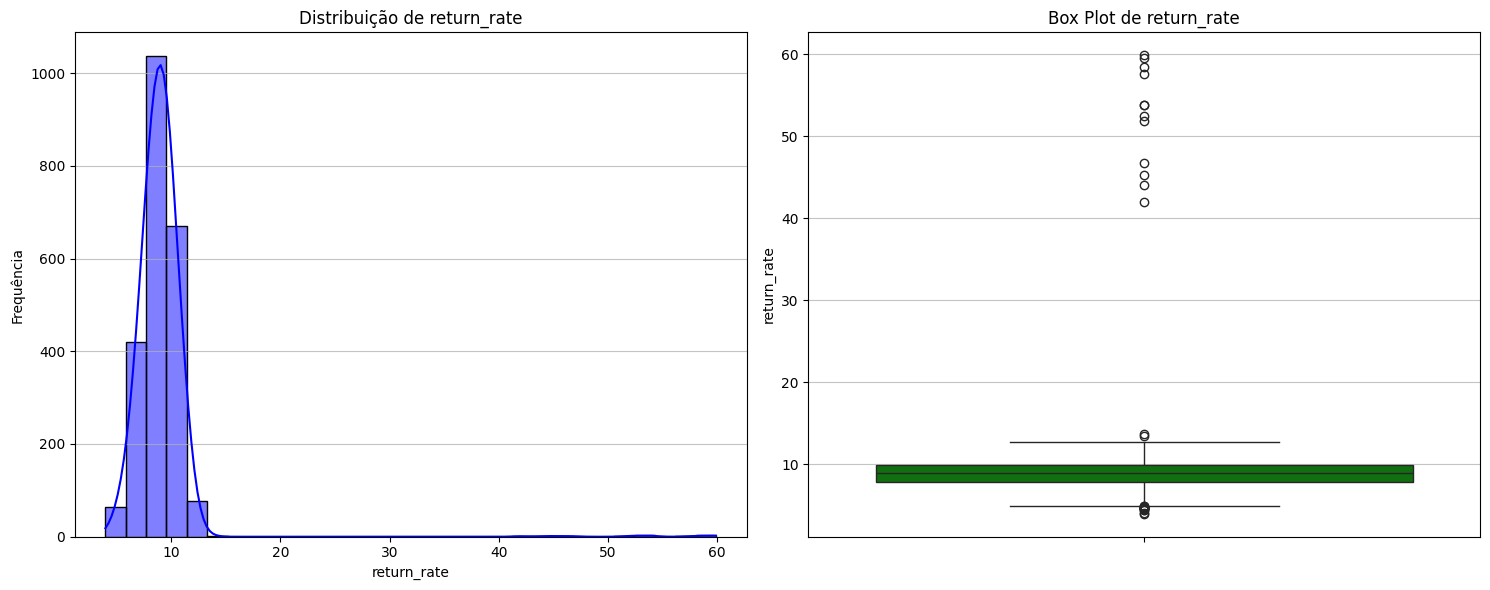

--------------------------------------------------

--- Análise para a coluna: mobile_traffic_pct ---
Estatísticas Descritivas:


,mobile_traffic_pct
count,2510.000000
mean,68.560331
std,7.568514
min,40.330000
25%,63.365000
50%,68.805000
75%,74.015000
max,87.960000


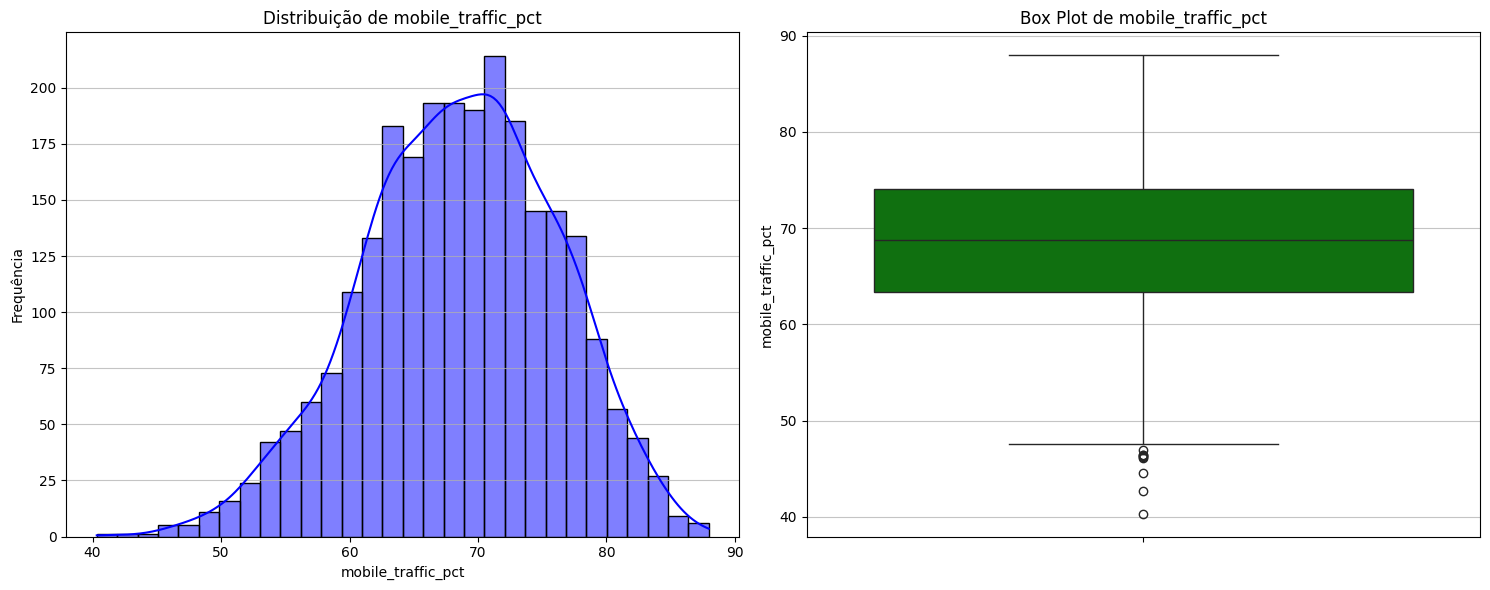

--------------------------------------------------


In [35]:

numerical_cols = df_ecommerce.select_dtypes(include=np.number).columns.tolist()
if 'monthly_sales' in numerical_cols:
    numerical_cols.remove('monthly_sales')

print("Iniciando a análise univariada das variáveis numéricas (excluindo 'monthly_sales').\n")

for col in numerical_cols:
    print(f"\n--- Análise para a coluna: {col} ---")
    print("Estatísticas Descritivas:")
    display(df_ecommerce[col].describe())

    plt.figure(figsize=(15, 6))

    # Histograma com KDE
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.histplot(df_ecommerce[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)

    # Box Plot
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.boxplot(y=df_ecommerce[col].dropna(), color='green')
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)

    plt.tight_layout()
    plt.show()
    print("--------------------------------------------------")


## 7 - Análise Univariada - Variáveis Categóricas

Vamos explorar a distribuição e estatísticas descritivas das variáveis categóricas, usando gráficos de contagem para entender a frequência de cada categoria.

Iniciando a análise univariada das variáveis categóricas.


--- Análise para a coluna: product_category ---
Contagem de Valores (Value Counts):


,count
product_category,
Fashion,729
Electronics,633
Home,501
Books,378
Sports,234
Fashion,7
Home,5
FASHION,4
ELECTRONICS,3


/tmp/ipython-input-4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


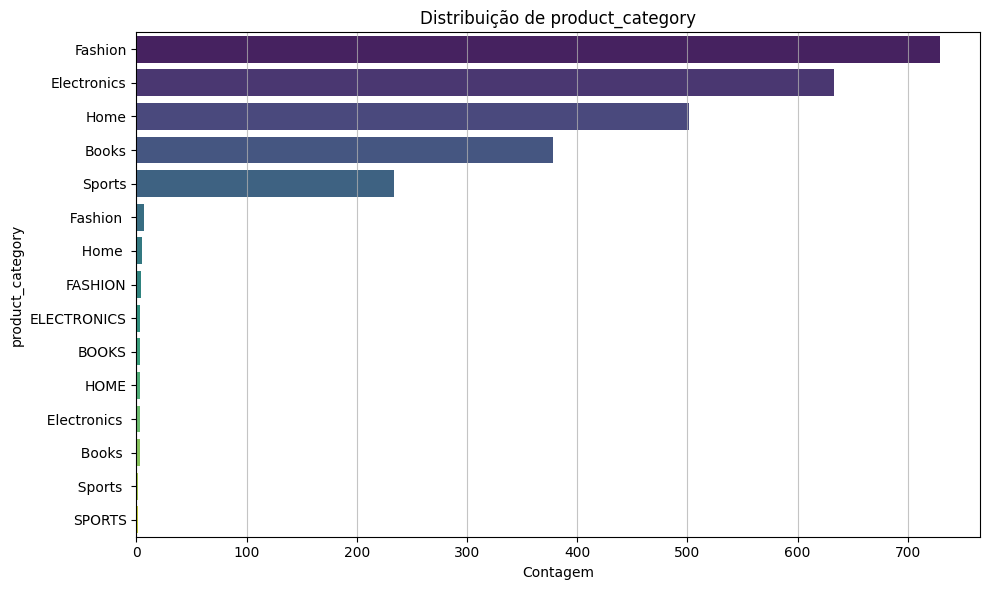

--------------------------------------------------

--- Análise para a coluna: competition_level ---
Contagem de Valores (Value Counts):


,count
competition_level,
Medium,1245
High,747
Low,483
MEDIUM,9
High,9
Medium,8
LOW,3
Low,3
HIGH,3


/tmp/ipython-input-4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


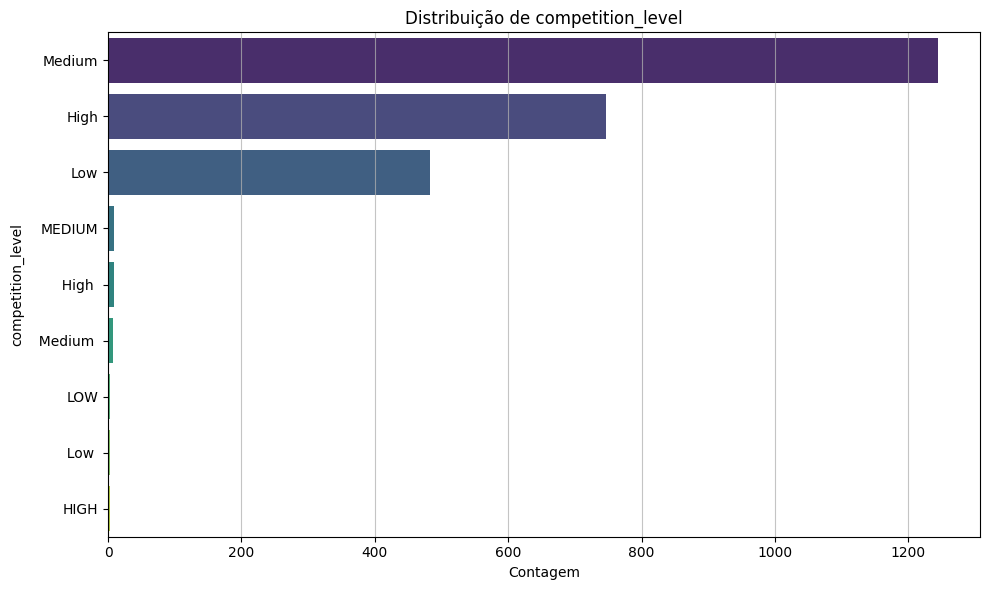

--------------------------------------------------

--- Análise para a coluna: seasonality ---
Contagem de Valores (Value Counts):


,count
seasonality,
Medium,1189
Low,759
High,527
Medium,10
MEDIUM,7
LOW,6
High,5
Low,5
HIGH,1


/tmp/ipython-input-4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


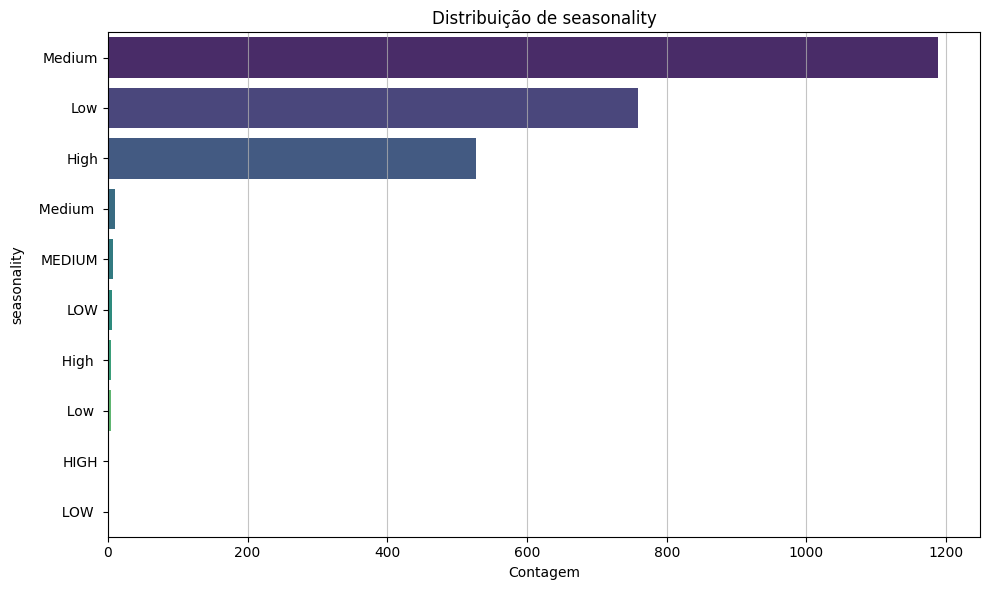

--------------------------------------------------

--- Análise para a coluna: free_shipping ---
Contagem de Valores (Value Counts):


,count
free_shipping,
Yes,1450
No,1026
No,10
Yes,9
YES,9
NO,5
YES,1


/tmp/ipython-input-4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


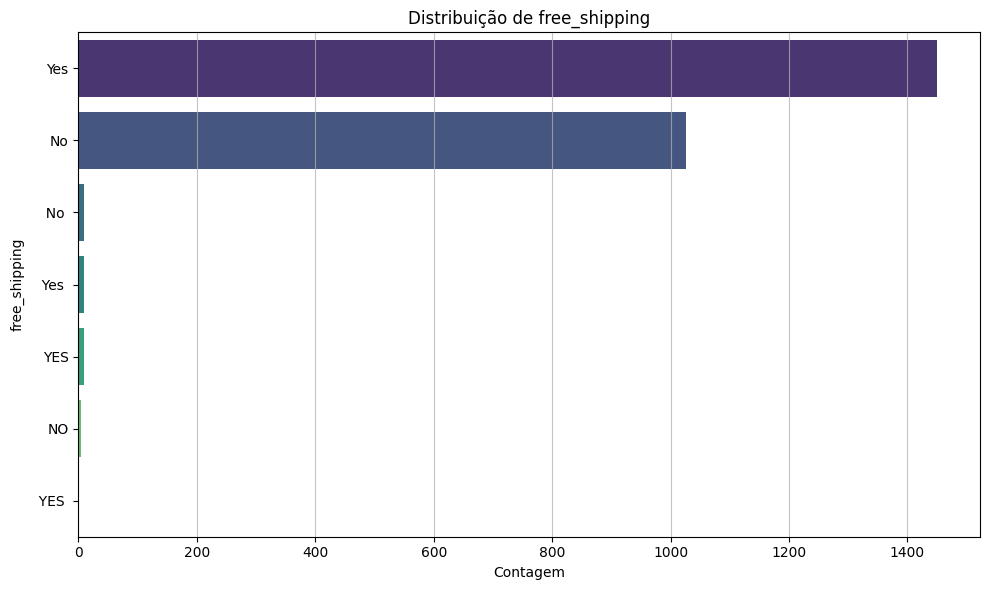

--------------------------------------------------

--- Análise para a coluna: payment_methods ---
Contagem de Valores (Value Counts):


,count
payment_methods,
Debit Card,632
Credit Card,616
PayPal,614
Bank Transfer,613
Bank Transfer,8
Credit Card,6
Debit Card,5
CREDIT CARD,4
DEBIT CARD,4


/tmp/ipython-input-4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


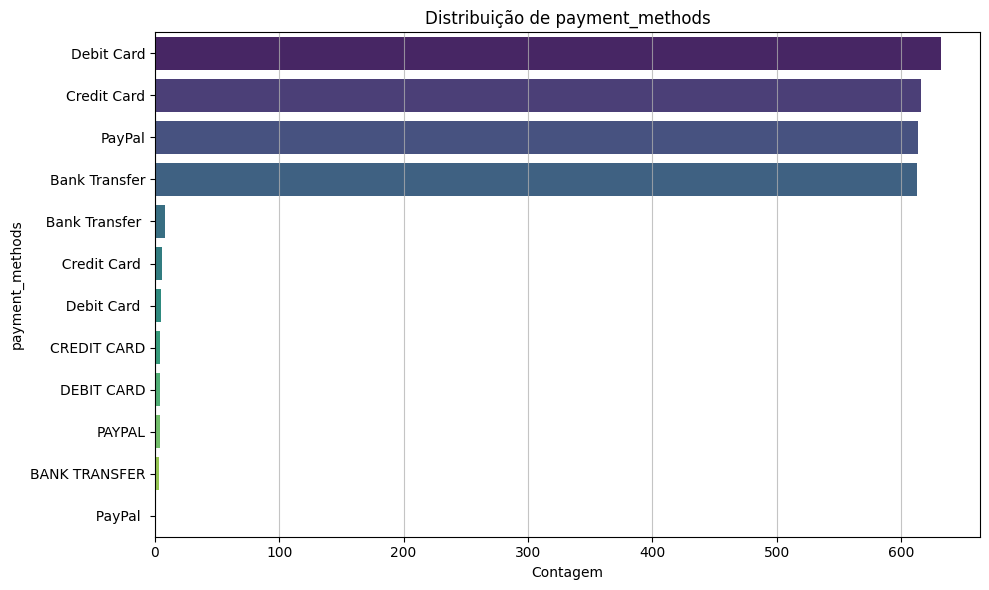

--------------------------------------------------


In [38]:

categorical_cols = df_ecommerce.select_dtypes(include='object').columns.tolist()

# Remover 'sale_id' da lista, pois é um identificador único e não uma variável categórica para análise de distribuição
if 'sale_id' in categorical_cols:
    categorical_cols.remove('sale_id')

print("Iniciando a análise univariada das variáveis categóricas.\n")

for col in categorical_cols:
    print(f"\n--- Análise para a coluna: {col} ---")
    print("Contagem de Valores (Value Counts):")
    display(df_ecommerce[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Contagem')
    plt.ylabel(col)
    plt.grid(axis='x', alpha=0.75)
    plt.tight_layout()
    plt.show()
    print("--------------------------------------------------")

## 8- Análise de Correlações

Vamos calcular e visualizar a matriz de correlação entre as variáveis numéricas, especialmente em relação à variável alvo `monthly_sales`, usando um mapa de calor.

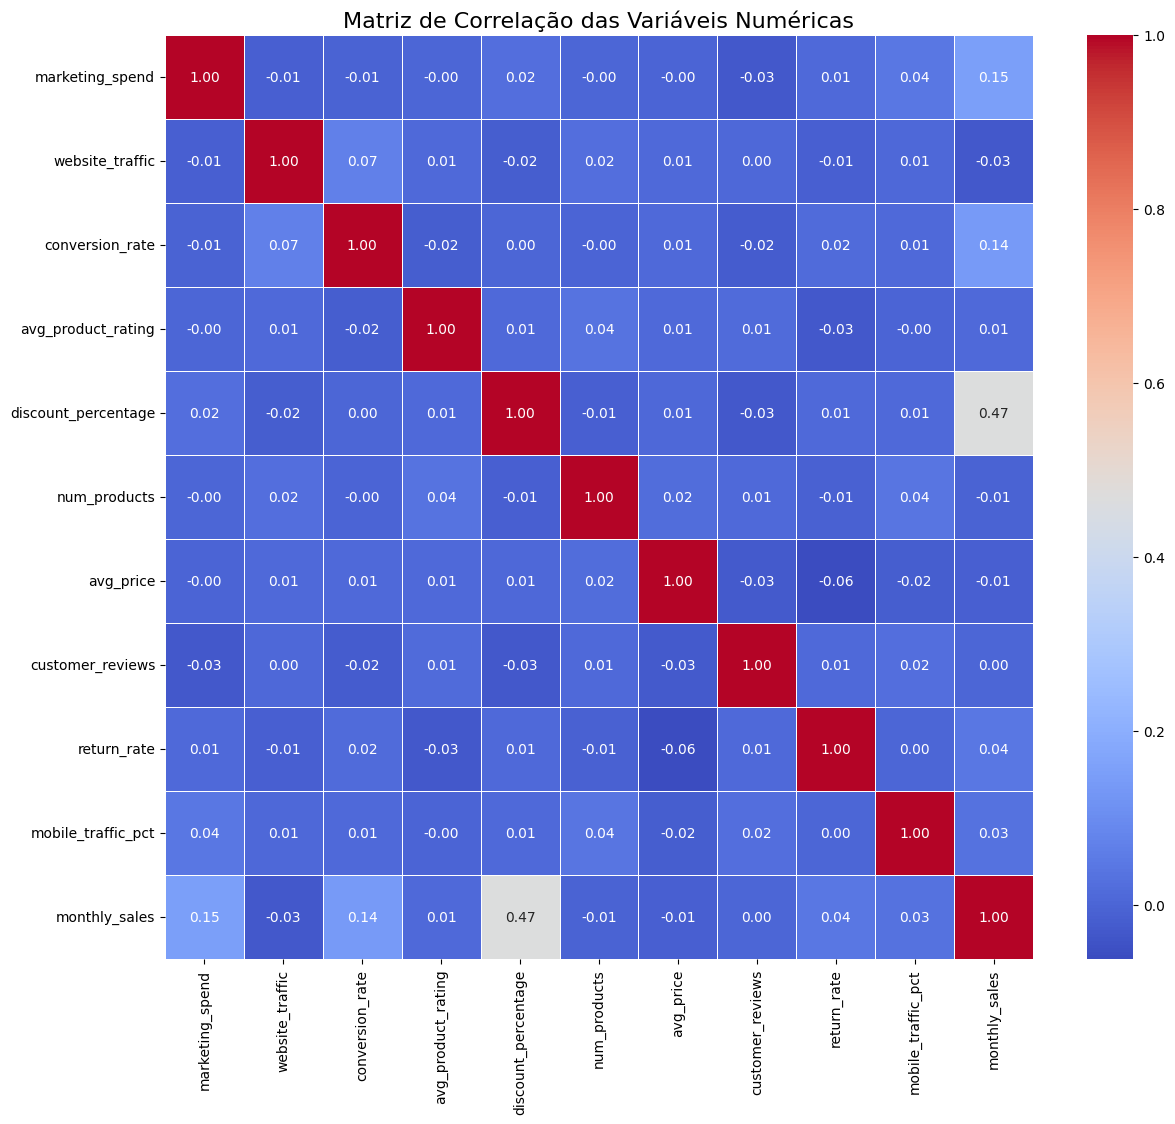

In [39]:
numerical_df = df_ecommerce.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

## 10-Identificação de outliners

 utilizando o método IQR, as variáveis que apresentam outliers mais notáveis e que tem destaque são:

discount_percentage: Esta é a variável com a maior proporção de outliers, 19.88% (499 valores). Isso é um ponto muito importante, pois sugere que a empresa tem uma política de descontos bastante variada, com promoções que fogem significativamente do padrão comum. Seria interessante investigar se esses descontos atípicos (muito altos ou muito baixos) estão relacionados a eventos específicos, produtos ou estratégias de vendas.

marketing_spend: Apresenta 1.25% de outliers (29 valores). Isso indica que, ocasionalmente, há investimentos em marketing significativamente maiores ou menores do que o habitual. Compreender esses picos pode revelar campanhas de alto impacto ou momentos de menor investimento que afetaram as vendas.

return_rate: Possui 1.23% de outliers (28 valores). Isso significa que, em alguns períodos ou para certos produtos, as taxas de devolução foram incomumente altas ou baixas. Analisar esses casos pode ajudar a identificar problemas de qualidade do produto, descrição inadequada, ou até mesmo fraudes.

website_traffic: Foram identificados 0.98% de outliers (23 valores). Isso pode apontar para picos ou quedas atípicas no tráfego do site, que podem estar ligadas a eventos externos, campanhas de marketing pontuais ou problemas técnicos.

conversion_rate: Registra 0.73% de outliers (17 valores). Isso mostra alguns períodos com taxas de conversão excepcionalmente fora da faixa esperada, o que pode indicar tanto campanhas de sucesso estrondoso quanto problemas no funil de vendas.

Outras variáveis como avg_product_rating (0.63%), avg_price (0.48%) e mobile_traffic_pct (0.36%) também possuem outliers, mas em menor proporção. As variáveis num_products e customer_reviews não apresentaram outliers significativos pelo método IQR.

Destacar discount_percentage é fundamental, dada a alta porcentagem de outliers, pois pode revelar padrões de negócio ou exigir um tratamento específico em futuras análises ou modelos preditivos.

In [ ]:
git add notebooks/